## PCA Visualized

Wine Dataset: https://archive.ics.uci.edu/ml/datasets/wine

Citation: https://archive.ics.uci.edu/ml/citation_policy.html

In [1]:
import numpy as np
import pandas as pd
import itertools
from timeit import timeit
import warnings
warnings.filterwarnings('ignore')

# Validation Metrics
from sklearn import metrics

# Pipeline and preprocessing
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #(setting multi_class=”multinomial”)
from sklearn.linear_model import Perceptron

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

# Bonus: PCA for Image Compression

An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.
The basic steps we'll follow:

 - Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). This is lossy compression, as we are discarding some of the information.
 - To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
We'll see how good the reconstructed images are for different number of selecte components.

https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example

(3120, 4160, 3)


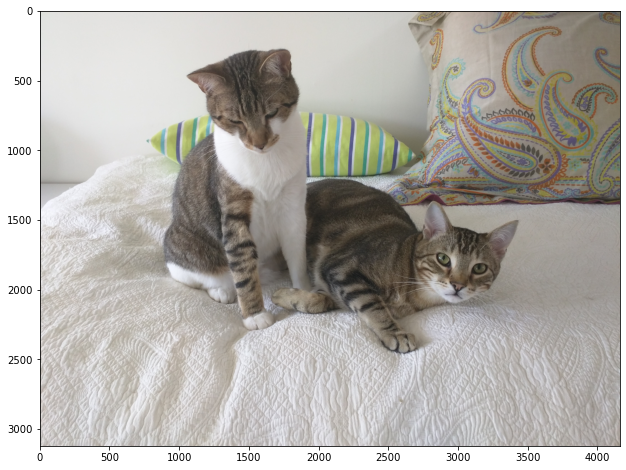

In [2]:
image_raw = imread("cat.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(3120, 4160)
1.0


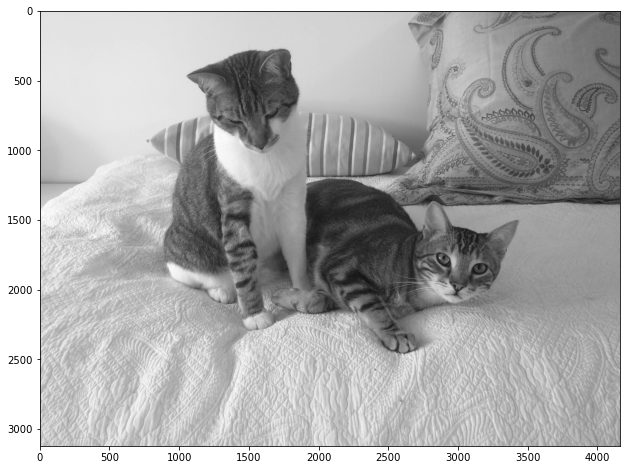

In [3]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

**Performing PCA on the image**

 - We'll perform PCA on the matrix with all the components
 - We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture
 - We'll pick a suitable number of components to represent the image for compression

Number of components explaining 95% variance: 54


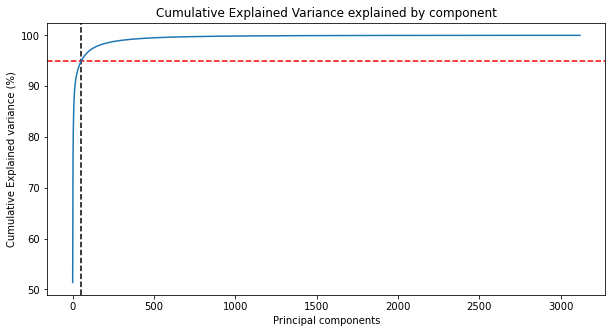

In [4]:
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [5]:
len(pca.components_)

3120

Looks like `54` components, instead of `3,120` pixels, can explain `95%` of the variance in the image.

Let's reconstruct the image using only `54` components and see if the reconstructed image is visually very different from the original.

**Reconstructing the b/w image with the limited number of components**

 - First, we'll use the `fit_transform` method from the `IncrementalPCA` module to first find the `54` PCs and transform and represent the data in those `54` new components/columns.
 - Next, we'll reconstruct the original matrix from these `54` components using the inverse_transform method.
 - We'll then plot the image to visually assess the quality of it.

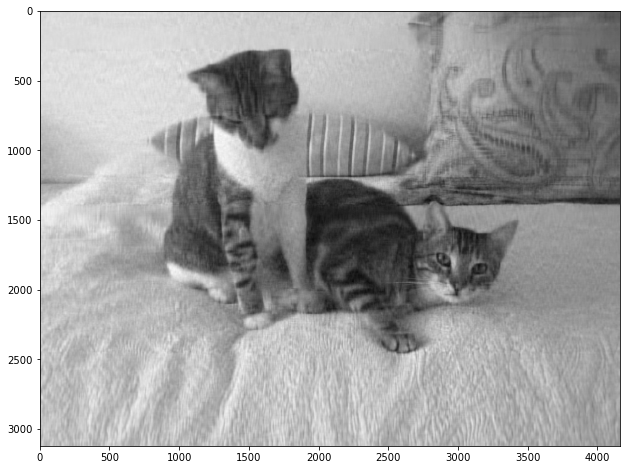

In [6]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Well, for 95% variance, we expected a clearer image, didn't we? Note that we got all the major elements captured for sure - you can still very well identify objects.

What's missing is the clarity - well, maybe it's the finer details in the visuals that make an image appealing and clear.

Let's try out a different value of k - 150 components

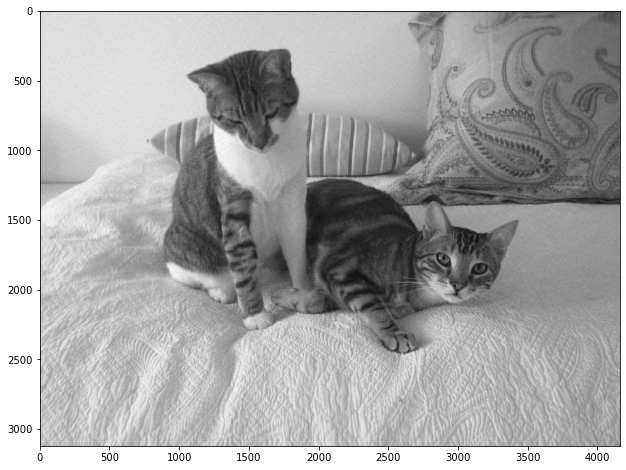

In [7]:
# Function to reconstruct and plot image for a given number of components
import timeit

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(k)

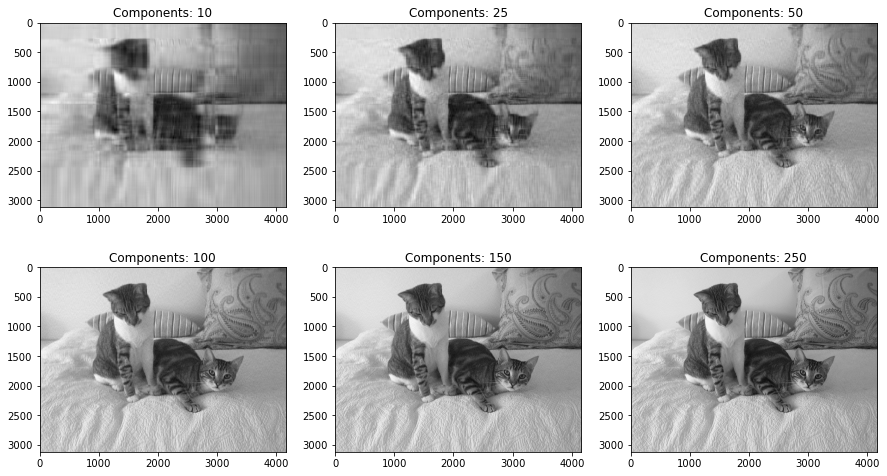

In [8]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()